# Diabetes Risk Prediction - Model Development

This notebook focuses on training and evaluating machine
learning models using the preprocessed dataset.

## Importing Dataset and Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/processed/diabetes_preprocessed_v1.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,1.764094,33.6,0.627,50,1
1,1,85.0,66.0,29.0,1.764094,26.6,0.351,31,0
2,8,183.0,64.0,29.0,1.764094,23.3,0.672,32,1
3,1,89.0,66.0,23.0,1.714496,28.1,0.167,21,0
4,0,137.0,40.0,35.0,1.813178,43.1,2.288,33,1


## Separate Features and Target

In [3]:
X= df.drop(columns="Outcome")
y= df["Outcome"]

print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0            6    148.0           72.0           35.0  1.764094  33.6   
1            1     85.0           66.0           29.0  1.764094  26.6   
2            8    183.0           64.0           29.0  1.764094  23.3   
3            1     89.0           66.0           23.0  1.714496  28.1   
4            0    137.0           40.0           35.0  1.813178  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


## Train-Test Split:
Stratified splitting is used to ensures that the proportion of 0s and 1s in your y_train and y_test is the same as the original dataset. 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X: (768, 8)
y: (768,)
X_train: (614, 8)
X_test: (154, 8)
y_train: (614,)
y_test: (154,)


## Feature Scaling:

In [5]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("X_train_scaled")
print(X_train_scaled)
print()
print("X_test_scaled")
print(X_test_scaled)

X_train_scaled
[[-0.85135507 -1.05642747 -0.82674004 ... -0.76947697  0.31079384
  -0.79216928]
 [ 0.35657564  0.14439907  0.47777235 ... -0.41749769 -0.11643851
   0.56103382]
 [-0.5493724  -0.55608308 -1.15286813 ...  0.3597899  -0.76486207
  -0.70759409]
 ...
 [-0.85135507 -0.82293342 -0.17448384 ...  0.82909561 -0.78607218
  -0.28471812]
 [ 1.86648903 -0.35594533 -0.17448384 ... -0.72547956 -1.01938346
   0.56103382]
 [ 0.05459296  0.74481233 -1.15286813 ... -0.43216349 -0.57700104
   0.30730824]]

X_test_scaled
[[ 0.96054099  1.24515673 -0.66367599 ... -0.74014536 -0.55579092
   0.56103382]
 [ 1.86648903 -1.79026591  2.76066903 ...  0.44778472 -0.58306107
   1.15306018]
 [-0.5493724   0.01097389  0.3147083  ...  0.50644793  0.01688223
  -0.6230189 ]
 ...
 [-0.5493724  -1.32327781 -1.64206028 ... -0.57882152  3.70138246
  -0.70759409]
 [ 0.05459296  2.07906404  0.47777235 ...  0.66777177 -0.64669142
  -0.20014293]
 [-0.85135507 -1.69019703  0.47777235 ...  0.11047124 -0.16794879
  

## Baseline Logistic Regression:

In [6]:
from sklearn.linear_model import LogisticRegression

# lr=LogisticRegression()
lr=LogisticRegression(class_weight='balanced')

lr.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test_scaled)
y_prob=lr.predict_proba(X_test_scaled)[:,-1]

## Evaluation:

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       100
           1       0.58      0.72      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

ROC-AUC: 0.8111111111111112


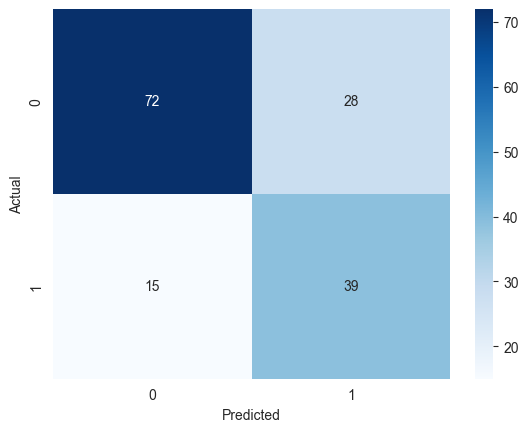

In [8]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
results = {
    "Model": ["Logistic (Baseline)", "Logistic (Balanced)"],
    "Accuracy": [0.71, 0.72],
    "Recall_Diabetic": [0.50, 0.72],
    "Precision_Diabetic": [0.60, 0.58],
    "f-1 Score_Diabetic": [0.55,0.64],
    "ROC-AUC Score": [0.814,0.811]
}

import pandas as pd
pd.DataFrame(results)

,Model,Accuracy,Recall_Diabetic,Precision_Diabetic,f-1 Score_Diabetic,ROC-AUC Score
0,Logistic (Baseline),0.71,0.50,0.60,0.55,0.814
1,Logistic (Balanced),0.72,0.72,0.58,0.64,0.811


## Remark:

Applying **class_weight='balanced'** significantly improved
recall for diabetic patients from 0.50 to 0.72, reducing
false negatives from 27 to 15.  
  
Although precision for the positive class decreased slightly,
the trade-off is acceptable in a medical screening scenario
where detecting disease is prioritized over minimizing
false alarms.

## Storing Trained Model:

In [12]:
import joblib

joblib.dump(lr, "../models/logistic_balanced_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']